<a href="https://colab.research.google.com/github/ryhyx/CodeTopdf/blob/master/Hrm_ML_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [18]:
# Step 2: Generate Synthetic Data
X, y = make_classification(n_samples=1000,    # Number of samples
                           n_features=5,      # Number of features
                           n_informative=3,   # Number of informative features
                           n_redundant=1,     # Number of redundant features
                           n_clusters_per_class=1, random_state=42)

# Create a DataFrame for easier manipulation
feature_names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']
df = pd.DataFrame(X, columns=feature_names)
df['left'] = y

In [19]:
# Step 3: Data Preprocessing
X = df.drop('left', axis=1)
y = df['left']

In [20]:
# Step 4: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


p ( X ) = e ( b 0 + b 1 ∗ X ) 1 + e ( b 0 + b 1 ∗ X )

In [21]:
# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
# Step 6: Make Predictions
y_pred = model.predict(X_test)


In [23]:
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.95
Confusion Matrix:
 [[ 86   7]
 [  3 104]]


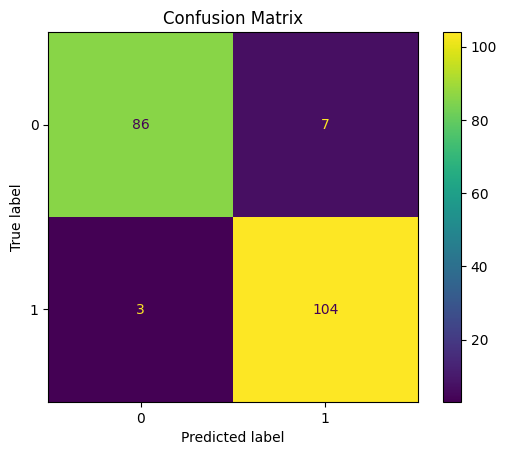

In [24]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot()
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Step 8: Predict for a New Employee
new_employee = [[0.5, 0.6, 3, 200, 3]]  # Example features
prediction = model.predict(new_employee)
print("Prediction for new employee (1: will leave, 0: will stay):", prediction[0])

Prediction for new employee (1: will leave, 0: will stay): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


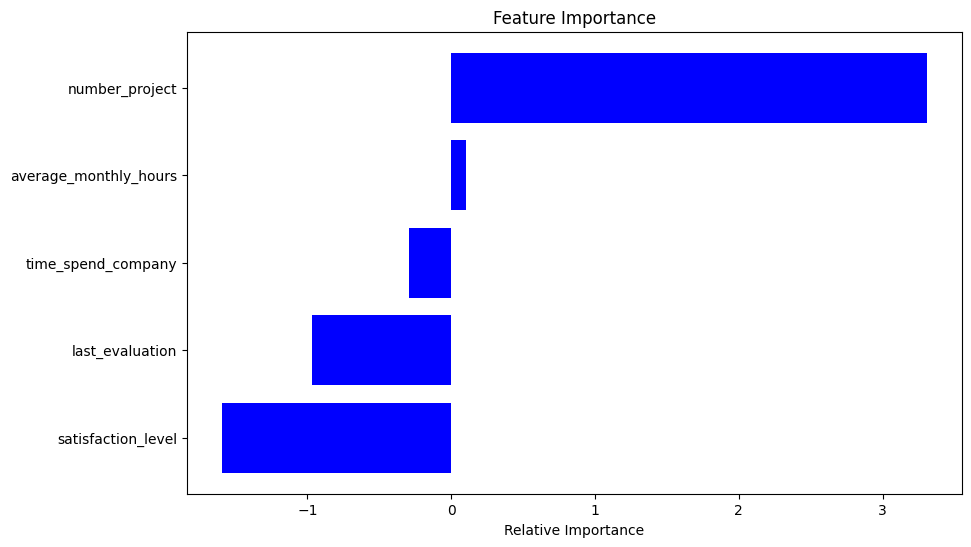

In [26]:

# Feature Importance Plot
importance = model.coef_[0]
features = X.columns
indices = np.argsort(importance)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()